# Classification

Classification is the supervised learning task of predicting the value of a categorical outcome ("class") variable, y, given real and/or categorical input ("feature") data, X. The objective of classification is to learn a model of the data that can be use to predict the correct class variable for new or unseen feature data.

A variety of classification algorithms exist. These algorithms have been developed under varying assumptions and employ different concepts. Each algorithm may interact with data differently based upon the size, dimensionality, and noise of the dataset, among other characteristics. These algorithms may have varying degrees of interpretability, variability, and bias.

Here, we'll use the scikit-learn (sklearn) package to expore the use of several classification algorithms. Let's fetch the Iris dataset from the UCI Machine Learning repository.

In [1001]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [1002]:
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)

In [1003]:
X = data.iloc[:, 0:4]
y = data.iloc[:,-1]
# X_train = data.iloc[:120, :2]  # use first two features
# X_test = data.iloc[120:, :2]
# y_train = data.iloc[:120, -1]  # class
# y_test = data.iloc[:120, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# print(X_train.head())
# print()
# print(y_train.head())

   Sepal Length  Sepal Width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object


In [1004]:
y_train

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
115    Iris-virginica
116    Iris-virginica
117    Iris-virginica
118    Iris-virginica
119    Iris-virginica
Name: Name, Length: 120, dtype: object

We need to encode the categorical class data as numbers, for the classification algorithms.

In [1005]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


Calling the `inverse_transform()` from the fit LabelEncoder will return the labels to their original values:

In [1006]:
print(le.inverse_transform(y_train))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

## _k_-Nearest Neighbors

One of the simplest classification algorithms is the _k_-nearest neighbors algorithm. Let's import it from `sklearn`. We can call the method with several available inputs. Here, we specify the number of neighbors _k_ to consider.

In [1007]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=7)

Every classifier in `sklearn` has a `fit()` method. For a supervised learning algorithm, which learns to map features X to classes y, we must input the corresponding X and y data.

In [1008]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

We call an algorithm fit (or parameterized) to input data a "model." Can now use the fitted model to predict the class y given new features X.

Here, we'll simply see how well the classifier can predict the data on which it was fit. We can predict on feature data using the fitted model's `predict()` method, the output of which are corresponding class predictions:

In [1009]:
y_pred = clf_knn.predict(X_train)
print(y_pred)
#clf_knn.kneighbors(X);

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2
 1 1 1 1 2 1 2 2 1]


We can compare the actual values, `y`, to the predicted values, `y_pred`. Here we compute the fraction of times that they match:

In [1010]:
print(np.average(y_train == y_pred))

0.8583333333333333


Let's try visualizing the results. We can use another Python package, `matplotlib`, to generate these visualizations.

## Warning
If this function runs too slow, pass a larger value to `stepsize`, e.g. `stepsize=1.0`, when making the function call.

In [1011]:
from matplotlib.colors import ListedColormap
#Warning: Will take a long time for larger data sets
def plot_decision_boundary(model, X, y, stepsize=.05):
    cmap_light = ListedColormap(['#FFAAAA', '#BBFFBB', '#AAAAFF'])  # color map for background
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # color map for points
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stepsize),
                         np.arange(y_min, y_max, stepsize))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)

/opt/homebrew/Caskroom/miniforge/base/envs/CSE_60647/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, '3-Nearest Neighbors')

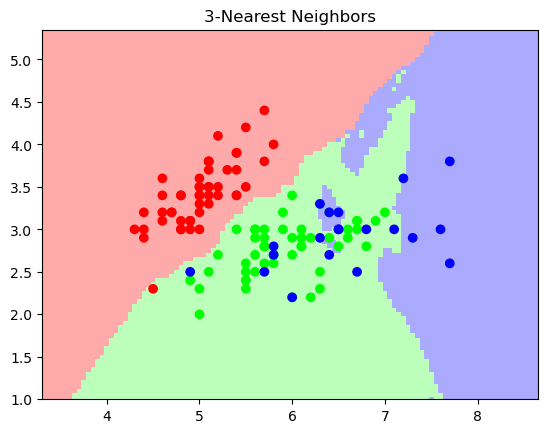

In [1012]:
plot_decision_boundary(clf_knn, X_train, y_train)
plt.title("3-Nearest Neighbors")

/opt/homebrew/Caskroom/miniforge/base/envs/CSE_60647/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, '7-Nearest Neighbors')

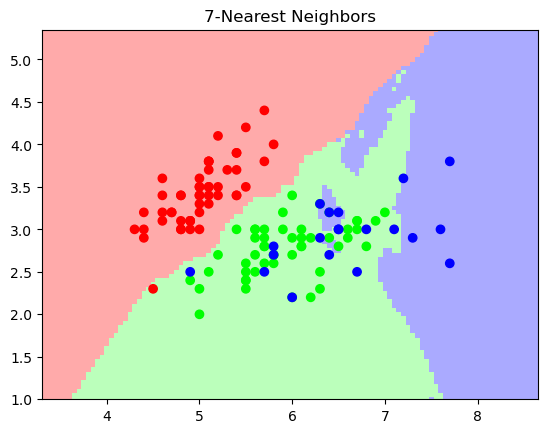

In [1013]:
plot_decision_boundary(clf_knn, X_train, y_train, stepsize=0.05)
plt.title("7-Nearest Neighbors")

Let's try fitting an visualizing another classifier, Gaussian Naive Byaes.

### Gaussian Naive Bayes

/opt/homebrew/Caskroom/miniforge/base/envs/CSE_60647/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Gaussian Naive Bayes')

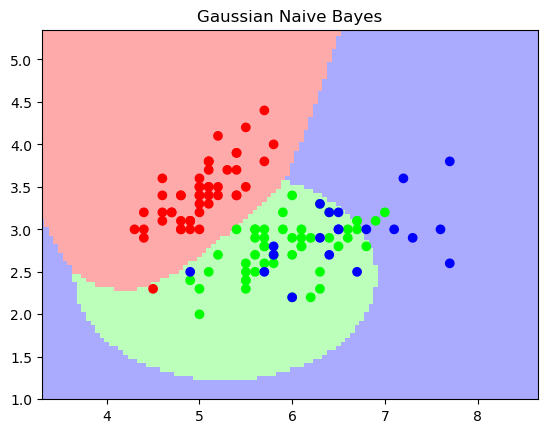

In [1014]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

plot_decision_boundary(clf_gnb, X_train, y_train)
plt.title("Gaussian Naive Bayes")

### Decision Tree Classifier

Let's try viewing the results from a decision tree classifier. As decision trees apply axis-parallel splits, we should find that every decision boundary is parallel to an axis; no diagonal decision regions should exist.

/opt/homebrew/Caskroom/miniforge/base/envs/CSE_60647/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Tree Classifier')

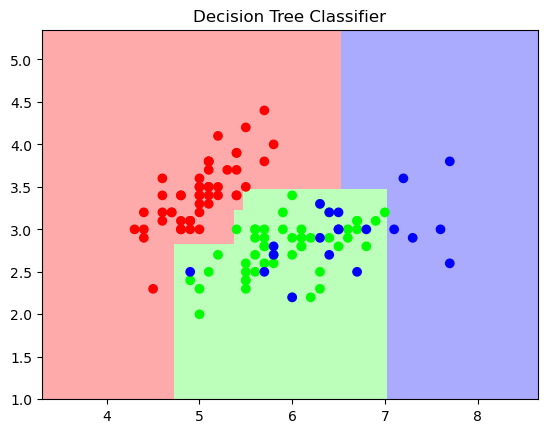

In [1015]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(max_depth=4)
clf_dtc.fit(X_train, y_train)

plot_decision_boundary(clf_dtc, X_train, y_train)
plt.title("Decision Tree Classifier")

## Model Selection using Train-Test Split

Now, when building a model, we're typically interested in performance on data **we haven't yet seen**. A simple model that simply memorizes the training data may perform well on the data we've seen but poorly on unseen data. Unless we can evaluate a model on unseen data, we don't know how accurate its predictions may be.

To address this issue, we can separate the data into training and testing sets. We can fit the model on the training data and then evaluate it on the separate testing data. `sklearn` provides a convenient function to do this. Let's save 20% of our data for testing, and use the rest for fitting our models.

In [1016]:
from sklearn.model_selection import train_test_split

In [1017]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_knn.fit(X_train, y_train)
clf_gnb.fit(X_train, y_train)
clf_dtc.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
y_pred_gnb = clf_gnb.predict(X_test)
y_pred_dtc = clf_dtc.predict(X_test)

print('knn = ', np.average(y_test == y_pred_knn))
print('gnb = ', np.average(y_test == y_pred_gnb))
print('dtc = ', np.average(y_test == y_pred_dtc))

ValueError: Found input variables with inconsistent numbers of samples: [150, 120]

### Train-Validate-Test Split

Sometimes it is helpful to split the data into three datasets, for training, validation, and testing. The validation data set is used repeatedly for tuning parameters of the algorithm, (called hyperparameters to differentiate them from the parameters that a particular model estimates). The test dataset is only used once, at the end, to assess the performance of a fully specified model.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
for data in [X_train, X_valid, X_test, y_train, y_valid, y_test]:
    print(data.shape)

### Select hyperparameters using validation dataset

For knn, try k from 3 to 23.

Let's first plot the decision boundary for the training data to become familiar with what the algorithm is doing.

In [ ]:
for i in range(3, 23+1, 2):
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    clf_knn.fit(X_train, y_train)
    y_pred = clf_knn.predict(X_train)
    plot_decision_boundary(clf_knn, X_train, y_train)
    plt.title(str(i) + "-Nearest Neighbors")

Now let's look at the accuracy of each model on the validation dataset.

In [ ]:
for i in range(3, 23+1, 2):
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    clf_knn.fit(X_train, y_train)
    y_pred = clf_knn.predict(X_valid)
    print(i, np.average(y_valid == y_pred))

Is there a clear answer? If not, what might be the issue?

We can also tune the depth of the decision tree classifier.

In [ ]:
for i in range(1,9):
    clf_dtc = DecisionTreeClassifier(max_depth=i)
    clf_dtc.fit(X_train, y_train)
    plot_decision_boundary(clf_dtc, X_train, y_train)
    plt.title("Decision Tree Classifier (depth %s)" % i)
    y_pred = clf_dtc.predict(X_valid)
    print(i, np.average(y_valid == y_pred))

Looking at the accuracy, is there a good depth for the decision tree? Look also at the decision boundaries to see how the different depth trees are dividing the data. Decisition tree models with shallow depths may _underfit_ the data, and those with very large depths may _overfit_ the data. 

## Housing Dataset

Let's practice applying what we've learned to a house price dataset for Ames, Iowa.

In [ ]:
df_houses = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')
print(df_houses.head())

In [ ]:
set(df_houses['Sale Type'])

### 1. Drop or fill missing values. Consider how to handle the following columns, which have many missing values: `Alley`, `Fence`, `Fireplace Qu`, `Misc Feature`, `Pool QC`.

In [ ]:
# Code goes here.

### 2. Separate the features and the class.

In [1018]:
# Code goes here.

### 3. Transform the features to dummy variables.

In [1019]:
# Code goes here.

### 4. Bin the SalePrice into two outcomes, 'high' or 'low'.

In [1020]:
# Code goes here.

### 5. Split the dataset into 80% training data and 20% testing data. Each row should consist of the features, `X`, and the binned sales price, `y`.

In [1021]:
# Code goes here.

### 6. Fit two models: a 5-nearest neighbors classifier and a 500-nearest neighbors classifier. Fit them both on the training data. Use all of the feature data, excluding the sales price, to predict the binned sales price.

In [1022]:
# Code goes here.

### 7. Compare the accuracy of the _k_-nearest neighbors classifiers on the test data. 

In [1023]:
# Code goes here.

### 8. Fit a Gaussian naive Bayes classifier on the training data. Compare the accuracy of the naive Bayes classifer with the accuracy of the _k_-nearest neighbors classifiers on the test data.

In [1024]:
# Code goes here.

### 9. Split the training data again into 80% training data and 20% validation data. 

In [1025]:
# Code goes here.

### 10. Using the training and validation data, tune the parameters of one of the algorithms to maximize its accuracy on the validation data.
_Note: Be sure to use the validation dataset, **not** the testing dataset._

In [1026]:
# Code goes here.

## Evaluation (Optional)

So, how did you do? You maximized the accuracy on the validation dataset, but what if that's an atypical sample or you overfit the data. Now, we check the model against the held-out _test_ dataset. Since we haven't looked at the test dataset yet (and chose it pseudo-randomly), it should give us an independent assessment. However, once you compare against the test dataset, you should not change the model anymore, because there will not be any further way to evaluate it statistically.

In [1027]:
from sklearn import metrics

A confusion matrix is a table used to compare the predicted and actual values in a supervised learning task.

In [1028]:
metrics.confusion_matrix(y_pred, y_valid)

ValueError: Found input variables with inconsistent numbers of samples: [120, 24]

Now, let's display the confusion matrix in a prettier format. Here we'll use a plotting library called `seaborn`, which is an interface built on top of matplotlib. I find it especially friendly for generating heatmaps like below.

In [ ]:
import itertools
import seaborn as sns

# get the original labels from the encoder
y_pred_labels = np.unique(le.inverse_transform(y_pred))
y_valid_labels = np.unique(le.inverse_transform(y_valid))

cm = metrics.confusion_matrix(y_pred, y_valid)
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=y_pred_labels, yticklabels=y_valid_labels)

plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

To account for class imbalance, two more metrics are sometimes used: precision and recall.

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png")

Let's look at precision and recall for your model predicting the home price.

In [ ]:
print(metrics.classification_report(y_pred, y_valid, target_names=y_pred_labels))

### For the housing data:
How did precision and recall compare across the high and low house prices? Since there is more data for the low house price, the model probably did better with that. 

What could you have done differently with the data to address this imbalance? (_Hint:_ What were some of the options described for sampling as a type of data reduction?)

Other useful metrics in the classification report are:
* The F1 score is the harmonic mean of the precision and recall. `F1 = 2 * (precision * recall) / (precision + recall)`
* The support is the number of occurrences of each class in `y_true`.